124 59 60 55


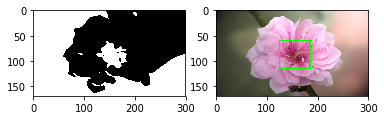

In [5]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("flower.jpeg")
img = cv2.resize(img, (300, 169))

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (7, 7), 0)
im2 = cv2.threshold(gray, 140, 240, cv2.THRESH_BINARY_INV)[1]

plt.subplot(1, 2, 1)
plt.imshow(im2, cmap="gray")

# 輪郭抽出
cnts = cv2.findContours(im2, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[1]

# 輪郭を描画
for pt in cnts:
    x, y, w, h = cv2.boundingRect(pt)
    # 大きい、小さいすぎるareaを除去
    if w < 30 or w > 200:
        continue
    print(x, y, w, h)
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
    
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.savefig("find_contrus.png", dip=200)
plt.show()

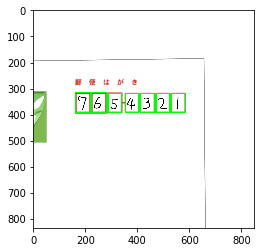

In [8]:
import cv2
import matplotlib.pyplot as plt

def detect_zipno(fname):
    img = cv2.imread(fname)
    h, w = img.shape[:2]
    img = img[0:h//2, w//3:]
    
    # 二値化
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (3, 3), 0)
    im2 = cv2.threshold(gray, 140, 255, cv2.THRESH_BINARY_INV)[1]
    
    # 輪郭抽出
    cnts = cv2.findContours(im2, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[1]
    
    result = []
    for pt in cnts:
        x, y, w, h = cv2.boundingRect(pt)
        if not (50 < w < 70): continue
        result.append([x, y, w, h])
    # 抽出した輪郭を左から並ぶようにソート
    result = sorted(result, key=lambda x: x[0])
    result2 = []
    lastx = -100
    for x, y, w, h in result:
        if (x - lastx) < 10: continue
        result2.append([x, y, w, h])
        lastx = x
    # 緑の枠を描画する
    for x, y, w, h in result2:
        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 3)
    return result2, img

if __name__ == '__main__':
    cnts, img = detect_zipno("letter01.png")
    
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.savefig("detect-zip.png", dpi=200)
    plt.show()

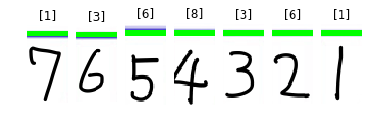

In [9]:
import matplotlib.pyplot as plt

from sklearn.externals import joblib

clf = joblib.load("digits.pkl")

cnts , img = detect_zipno("letter01.png")

for i, pt in enumerate(cnts):
    x, y, w, h = pt
    x += 8
    y += 8
    w -= 16
    y -= 16
    
    im2 = img[y:y+h, x:x+w]
    im2gray = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY)
    im2gray = cv2.resize(im2gray, (8, 8))
    im2gray = 15 - im2gray
    im2gray = im2gray.reshape((-1, 64))
    
    res = clf.predict(im2gray)
    
    plt.subplot(1, 7, i + 1)
    plt.imshow(im2)
    plt.axis("off")
    plt.title(res)
plt.show()